In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [4]:
cities = pd.read_csv(city_data_to_load)
rides = pd.read_csv(ride_data_to_load)

In [9]:
cities.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
rides.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [11]:
cities.count()

city            120
driver_count    120
type            120
dtype: int64

In [12]:
rides.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
cities.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
cities['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
sum(cities['type']=='Urban')

66

In [18]:
rides.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
pyber = pd.merge(rides, cities, how='left', on=['city', 'city'])

In [22]:
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [27]:
urban_cities = pyber[pyber['type']=='Urban']
urban_cities.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
suburban_cities = pyber[pyber['type']=='Suburban']
rural_cities = pyber[pyber['type']=='Rural']

In [30]:
urban_rides = urban_cities.groupby(['city']).count()['ride_id']
urban_rides.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [31]:
suburban_rides = suburban_cities.groupby(['city']).count()['ride_id']
rural_rides = rural_cities.groupby(['city']).count()['ride_id']

In [33]:
urban_avg_fare = urban_cities.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [34]:
suburban_avg_fare = suburban_cities.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities.groupby(['city']).mean()['fare']

In [35]:
urban_drivers = urban_cities.groupby(['city']).mean()['driver_count']
urban_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [36]:
suburban_drivers = suburban_cities.groupby(['city']).mean()['driver_count']
rural_drivers = rural_cities.groupby(['city']).mean()['driver_count']

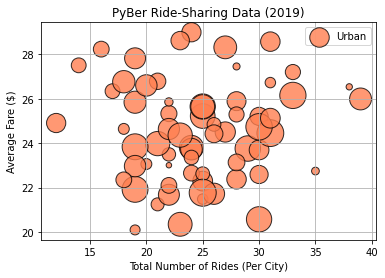

In [43]:
plt.scatter(urban_rides, urban_avg_fare, s=10*urban_drivers,
           c='coral', edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

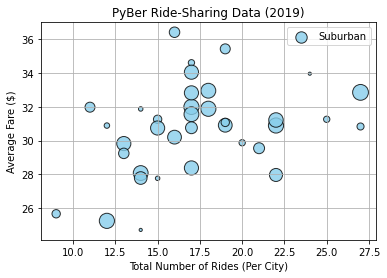

In [45]:
plt.scatter(suburban_rides, suburban_avg_fare, s=10*suburban_drivers,
           c='skyblue', edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

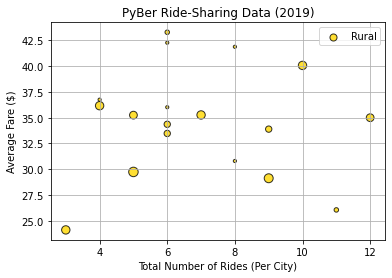

In [46]:
plt.scatter(rural_rides, rural_avg_fare, s=10*rural_drivers,
           c='gold', edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

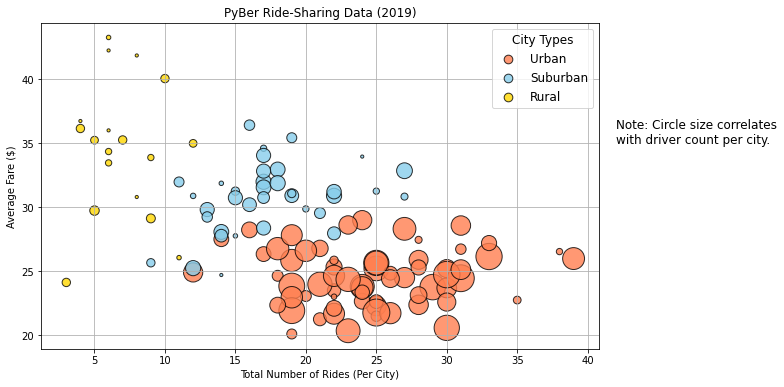

In [61]:
plt.subplots(figsize=(10, 6))

plt.scatter(urban_rides, urban_avg_fare, s=10*urban_drivers,
           c='coral', edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_rides, suburban_avg_fare, s=10*suburban_drivers,
           c='skyblue', edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.scatter(rural_rides, rural_avg_fare, s=10*rural_drivers,
           c='gold', edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1,
                 loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

plt.text(42, 35, 'Note: Circle size correlates\nwith driver count per city.', fontsize='12')

plt.savefig('Analysis/Fig1.png')

plt.show()

In [62]:
urban_cities.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [63]:
urban_rides.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [65]:
round(urban_rides.mean(), 2), round(suburban_rides.mean(), 2), round(rural_rides.mean(), 2)

(24.62, 17.36, 6.94)

In [66]:
urban_rides.mode()

0    22
1    25
dtype: int64

In [67]:
import numpy as np
import scipy.stats as sts

In [72]:
mean_urban_rides = np.mean(urban_rides)
print(f'The mean for the ride counts for urban trips is {mean_urban_rides:.2f}.')

median_urban_rides = np.median(urban_rides)
print(f'The median for the ride counts for urban trips is {median_urban_rides}.')

mode_urban_rides = sts.mode(urban_rides)
print(f'The mode for the ride counts for urban trips is {mode_urban_rides}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [85]:
urban_fares = urban_cities['fare']

suburban_fares = suburban_cities['fare']

rural_fares = rural_cities['fare']

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [75]:
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [76]:
urban_drivers2 = urban_cities['driver_count']
urban_drivers2.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

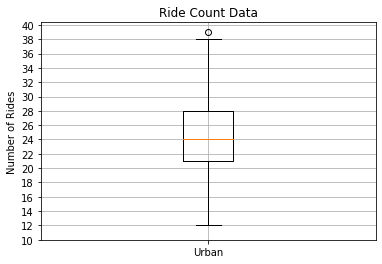

In [80]:
x_labels = ['Urban']

fig, ax = plt.subplots()

ax.boxplot(urban_rides, labels=x_labels)

ax.set_title('Ride Count Data')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2))
ax.grid()

plt.show()

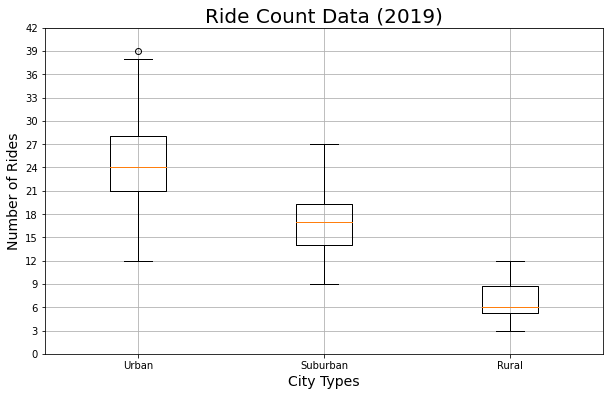

In [81]:
x_labels = ['Urban', 'Suburban', 'Rural']

ride_count_data = [urban_rides, suburban_rides, rural_rides]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3))
ax.grid()

plt.savefig('Analysis/Fig2.png')

plt.show()

In [82]:
urban_city_outlier = urban_rides[urban_rides==39].index[0]

print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


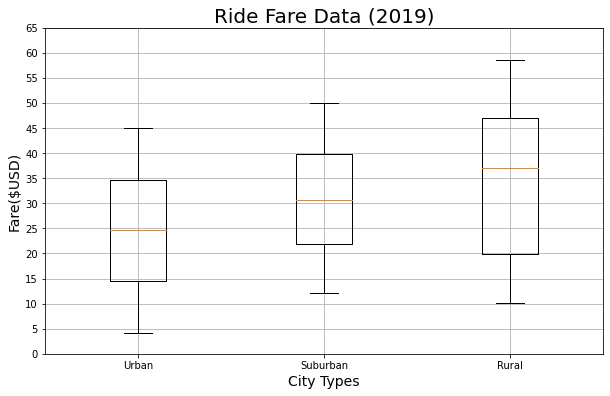

In [89]:
x_labels = ['Urban', 'Suburban', 'Rural']

ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_fare_data, labels=x_labels)

ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 70, step=5))
ax.grid()

plt.savefig('Analysis/Fig3.png')

plt.show()

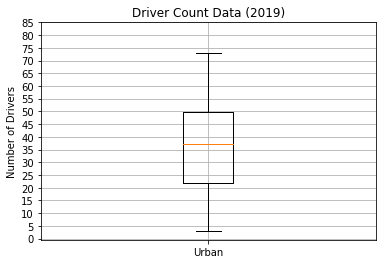

Summary Statistics


count    66.000000
mean     36.439394
std      19.827819
min       3.000000
25%      22.000000
50%      37.000000
75%      49.750000
max      73.000000
Name: driver_count, dtype: float64

In [90]:
x_labels = ['Urban']

fig, ax = plt.subplots()

ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5))
ax.grid()

plt.show()

print('Summary Statistics')

urban_drivers.describe()

In [ ]:
x_labels = ['Urban', 'Suburban', 'Rural']

driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(driver_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5))
ax.grid()

plt.savefig('Analysis/Fig4.png')

plt.show()